In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from scipy import stats
import matplotlib as mpl
!pip install joypy
import joypy

In [ ]:
# https://www.kaggle.com/jackleenrasmybareh/heart-failure

In [2]:
data = pd.read_csv('Dyakonov.csv')

In [3]:
data

,id,death,los,age,gender,cancer,cabg,crt,defib,dementia,...,pacemaker,pneumonia,prior_appts_attended,prior_dnas,pci,stroke,senile,quintile,ethnicgroup,fu_time
0,1,0,2,90,2,0,0,0,0,0,...,0,0,4,0,0,0,0,2.0,NaN,416
1,2,0,10,74,1,0,0,0,0,0,...,0,1,9,1,0,0,0,4.0,1.0,648
2,3,0,3,83,2,0,0,0,0,0,...,0,0,1,0,0,0,0,3.0,1.0,466
3,4,0,1,79,1,0,0,0,0,0,...,1,0,9,2,1,1,0,5.0,1.0,441
4,5,0,17,94,2,0,0,0,0,0,...,0,0,3,0,0,0,0,2.0,1.0,371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,0,8,73,1,0,0,0,0,0,...,0,0,0,0,0,0,0,5.0,1.0,351
996,997,1,5,84,2,0,0,0,0,0,...,0,0,9,0,0,0,0,3.0,1.0,1030
997,998,0,3,87,1,0,0,0,0,0,...,0,0,3,0,0,0,0,4.0,1.0,15
998,999,1,62,86,2,0,0,0,0,0,...,0,1,1,0,0,0,0,2.0,1.0,339


In [4]:
data.describe()

,id,death,los,age,gender,cancer,cabg,crt,defib,dementia,...,pacemaker,pneumonia,prior_appts_attended,prior_dnas,pci,stroke,senile,quintile,ethnicgroup,fu_time
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000,994.00000,957.000000,1000.000000
mean,500.500000,0.492000,10.774000,78.731000,1.45200,0.051000,0.014000,0.003000,0.006000,0.045000,...,0.037000,0.117000,5.538000,0.501000,0.02900,0.02000,0.044000,3.15996,1.230930,465.952000
std,288.819436,0.500186,12.581384,11.135198,0.49794,0.220108,0.117549,0.054717,0.077266,0.207408,...,0.188856,0.321581,6.838225,1.108706,0.16789,0.14007,0.205198,1.36551,1.115676,338.991187
min,1.000000,0.000000,0.000000,29.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.00000,1.000000,0.000000
25%,250.750000,0.000000,3.000000,73.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.00000,0.00000,0.000000,2.00000,1.000000,117.750000
50%,500.500000,0.000000,7.000000,80.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,3.000000,0.000000,0.00000,0.00000,0.000000,3.00000,1.000000,475.000000
75%,750.250000,1.000000,13.000000,87.000000,2.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,8.000000,1.000000,0.00000,0.00000,0.000000,4.00000,1.000000,743.250000
max,1000.000000,1.000000,89.000000,102.000000,2.00000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,62.000000,10.000000,1.00000,1.00000,1.000000,5.00000,9.000000,1107.000000


In [5]:
data['gender'].describe()

count    1000.00000
mean        1.45200
std         0.49794
min         1.00000
25%         1.00000
50%         1.00000
75%         2.00000
max         2.00000
Name: gender, dtype: float64

In [6]:
Counter(data['gender']).keys()

dict_keys([2, 1])

In [7]:
Counter(data['gender']).values()

dict_values([452, 548])

In [8]:
'''death (0/1)

los (hospital length of stay in nights)

age (in years)

gender (1=male, 2=female)

cancer

cabg (previous heart bypass) - шунтирование сердца

crt (cardiac resynchronisation device - a treatment for heart failure) - устройство для сердечной ресинхронизации - лечение сердечной недостаточности

defib (defibrillator implanted)  - дефибрилятор 

dementia - слабоумие

diabetes (any type) - диабет

hypertension - гипертония

ihd (ischaemic heart disease)

mental_health (any mental illness) - психическое здоровье

arrhythmias - аритмия

copd (chronic obstructive lung disease) - хроническая обструктивная болезнь легких

obesity - ожирение

pvd (peripheral vascular disease) - заболевание периферических сосудов

renal_disease - почечная недостаточность

valvular_disease (disease of the heart valves) - поражение сердечного клапана

metastatic_cancer - метастатический рак

pacemaker - кардиостимулятор

pneumonia - пневмония

priorapptsattended (number of outpatient appointments attended in the previous year) - количество амбулаторных приемов в предыдущем году

prior_dnas (number of outpatient appointments missed in the previous year) - количество пропущенных амбулаторных приемов в прошлом году

pci (percutaneous coronary intervention) - чрезкожное коронарное вмешательство

stroke (history of stroke) - инсульт

senile - глубокая старость

quintile (socio-economic status for patient's neighbourhood, from 1 (most affluent) to 5 (poorest)) - социальный статус места проживания

ethnicgroup (see below for categories) - этническая группа

fu_time (follow-up time, i.e. time in days since admission to hospital) - время наблюдения

Ethnic group has the following categories in this extract:

1=white

2=black

3=Indian subcontinent

8=not known

9=other

Inspiration :

Factors associated with hospital emergency readmission and mortality rates in patients with heart failure.'''

"death (0/1)\n\nlos (hospital length of stay in nights)\n\nage (in years)\n\ngender (1=male, 2=female)\n\ncancer\n\ncabg (previous heart bypass) - шунтирование сердца\n\ncrt (cardiac resynchronisation device - a treatment for heart failure) - устройство для сердечной ресинхронизации - лечение сердечной недостаточности\n\ndefib (defibrillator implanted)  - дефибрилятор \n\ndementia - слабоумие\n\ndiabetes (any type) - диабет\n\nhypertension - гипертония\n\nihd (ischaemic heart disease)\n\nmental_health (any mental illness) - психическое здоровье\n\narrhythmias - аритмия\n\ncopd (chronic obstructive lung disease) - хроническая обструктивная болезнь легких\n\nobesity - ожирение\n\npvd (peripheral vascular disease) - заболевание периферических сосудов\n\nrenal_disease - почечная недостаточность\n\nvalvular_disease (disease of the heart valves) - поражение сердечного клапана\n\nmetastatic_cancer - метастатический рак\n\npacemaker - кардиостимулятор\n\npneumonia - пневмония\n\npriorapptsatte

In [9]:
data

,id,death,los,age,gender,cancer,cabg,crt,defib,dementia,...,pacemaker,pneumonia,prior_appts_attended,prior_dnas,pci,stroke,senile,quintile,ethnicgroup,fu_time
0,1,0,2,90,2,0,0,0,0,0,...,0,0,4,0,0,0,0,2.0,NaN,416
1,2,0,10,74,1,0,0,0,0,0,...,0,1,9,1,0,0,0,4.0,1.0,648
2,3,0,3,83,2,0,0,0,0,0,...,0,0,1,0,0,0,0,3.0,1.0,466
3,4,0,1,79,1,0,0,0,0,0,...,1,0,9,2,1,1,0,5.0,1.0,441
4,5,0,17,94,2,0,0,0,0,0,...,0,0,3,0,0,0,0,2.0,1.0,371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,0,8,73,1,0,0,0,0,0,...,0,0,0,0,0,0,0,5.0,1.0,351
996,997,1,5,84,2,0,0,0,0,0,...,0,0,9,0,0,0,0,3.0,1.0,1030
997,998,0,3,87,1,0,0,0,0,0,...,0,0,3,0,0,0,0,4.0,1.0,15
998,999,1,62,86,2,0,0,0,0,0,...,0,1,1,0,0,0,0,2.0,1.0,339


Text(0, 0.5, 'Количество пациентов')

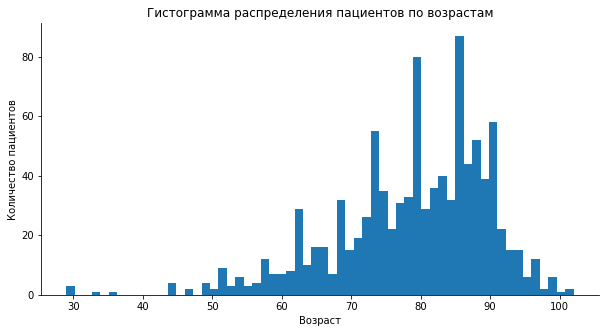

In [10]:
plt.figure(figsize=(10,5))
plt.hist(data.age, bins = 60)
sns.despine()
plt.title('Гистограмма распределения пациентов по возрастам')
plt.xlabel('Возраст')
plt.ylabel('Количество пациентов')

In [11]:
Counter(data['age']).most_common(6)


[(88, 52), (85, 48), (80, 47), (87, 44), (83, 40), (89, 39)]

In [12]:
agelower = data[data['age']<70]['age']

In [13]:
Counter(agelower).most_common(2)

[(63, 18), (68, 18)]

In [14]:
#На гистограмме распределены пациенты по возрастам заметны пики с примерно равными интервалами в 2-3 года. Можно предположить, что в определенные возраста раз в 2-3 года жители проходят диспансеризацию.

([<matplotlib.axis.YTick at 0x7fec428eed00>,
 [Text(0, 0, 'норма'), Text(0, 0, 'болен')])

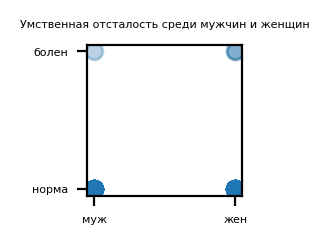

In [15]:
plt.figure(figsize=(1, 1), dpi=200)
plt.scatter(data['gender'], data['dementia'], alpha = 1/40)
plt.title('Умственная отсталость среди мужчин и женщин', fontsize = 4)
plt.xticks([1,2], ['муж', 'жен'],fontsize = 4)
plt.yticks([0, 1], ['норма', 'болен'], fontsize = 4)

In [16]:
dim1 = data[data['dementia'] == 1]['dementia']

([<matplotlib.axis.YTick at 0x7fec42a63a90>,
 [Text(0, 0, 'муж'), Text(0, 0, 'жен')])

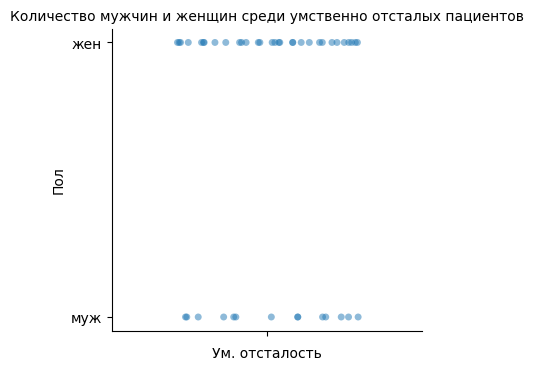

In [17]:
plt.figure(figsize=(4, 4), dpi=100)
sns.stripplot(x = dim1, y=data.gender, data=data, alpha=.50, jitter = 0.3)
sns.despine()
plt.title('Количество мужчин и женщин среди умственно отсталых пациентов', fontsize = 10)
plt.xlabel('Ум. отсталость', fontsize = 10)
plt.ylabel('Пол', fontsize = 10)
plt.xticks([0], '')
plt.yticks([1, 2], ['муж', 'жен'])

In [18]:
#Среди умственно отсталых пациентов больше женщин, хотя количество мужчин и женщин в выборке примерно одинаково (мужчин даже немного больше). Можно было бы предположить, что это связано с тем, что женщины чаще страдают данным заболеванием, однако мед. исследования опровергают этот факт. Скорее, это связано с малым размером выборки.

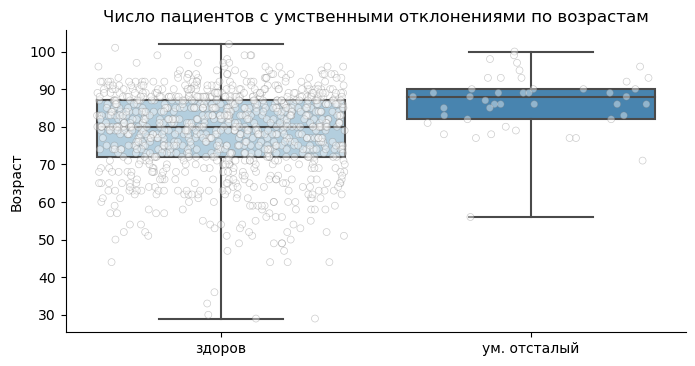

In [19]:
plt.figure(figsize=(8, 4), dpi=100)
sns.stripplot(x = data['dementia'], y=data['age'], data=data, alpha=.40, jitter = 0.4, color = 'white', edgecolor ='grey', linewidth=0.5)
sns.boxplot(x=data['dementia'], y=data['age'], whis=np.inf, palette = 'Blues')
sns.despine()
plt.xlabel('')
plt.ylabel('Возраст')
#plt.xticks([0, 1], ['жив', 'мертв'],fontsize = 10)
plt.xticks([0, 1], ['здоров', 'ум. отсталый'],fontsize = 10)
plt.title('Число пациентов с умственными отклонениями по возрастам')
sns.despine()

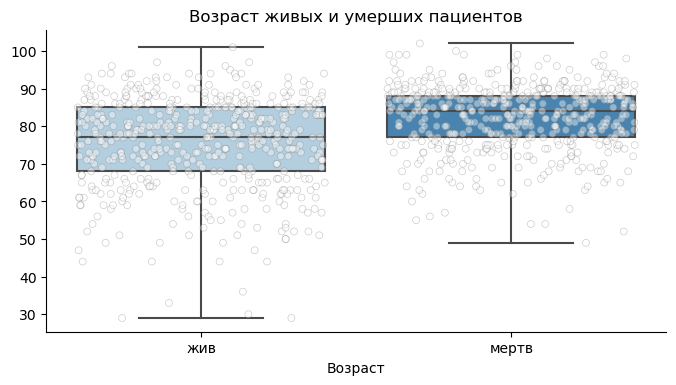

In [20]:
plt.figure(figsize=(8, 4), dpi=100)
sns.stripplot(x = data['death'], y=data['age'], data=data, alpha=.40, jitter = 0.4, color = 'white', edgecolor ='grey', linewidth=0.5)
sns.boxplot(x=data['death'], y=data['age'], whis=np.inf, palette = 'Blues')
sns.despine()
plt.xlabel('Возраст')
plt.ylabel('')
plt.xticks([0, 1], ['жив', 'мертв'],fontsize = 10)
#plt.yticks([0, 1], ['здоров', 'ум. отсталый'],fontsize = 10)
plt.title('Возраст живых и умерших пациентов')
sns.despine()

In [21]:
#Средний возраст людей с умственными отклонениями выше, как и средний возраст умерших пациентов. С возрастом растет риск появления умственных отклонений, а чем старше человек, тем выше риск умереть.

Text(0, 0.5, 'Кол-во дней')

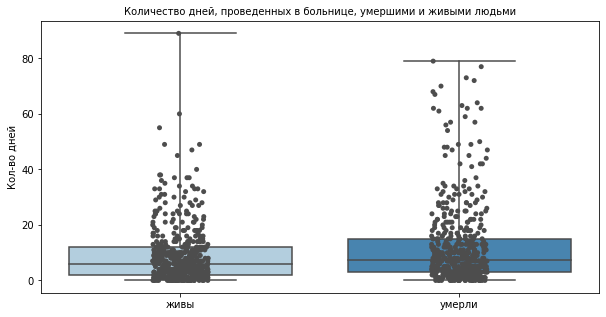

In [22]:
plt.figure(figsize=(10,5))
ax = sns.boxplot(x=data['death'], y=data['los'], whis=np.inf, palette = 'Blues')
ax = sns.stripplot(x=data['death'], y=data['los'], color=".3")
plt.xticks([0,1], ['живы', "умерли"])
plt.title('Количество дней, проведенных в больнице, умершими и живыми людьми', fontsize = 10)
plt.xlabel('')
plt.ylabel('Кол-во дней', fontsize = 10)


In [23]:
#Умершие находились в больнице в среднем дольше живых. Кроме того, дисперсия первых сильнее. Вероятно, среди умерших было больше людей с тяжелыми заболеваниями, которые требовали длительного лечения.

([<matplotlib.axis.YTick at 0x7fec43027d30>,
 [Text(0, 0, 'здоров'), Text(0, 0, 'рак')])

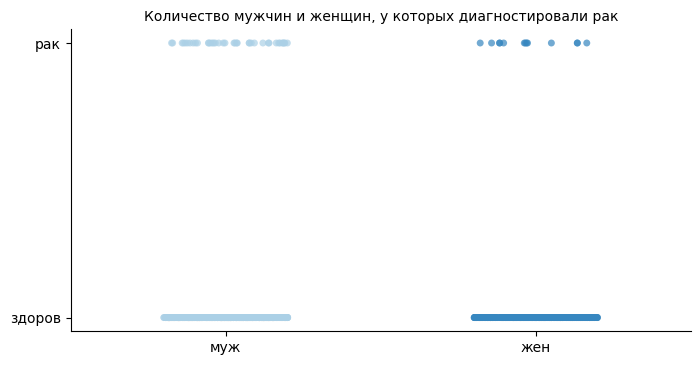

In [24]:
plt.figure(figsize=(8, 4), dpi=100)
sns.stripplot(x = data['gender'], y=data['cancer'], data=data, alpha=.70, jitter = 0.2, palette = 'Blues')
sns.despine()
plt.title('Количество мужчин и женщин, у которых диагностировали рак', fontsize = 10)
plt.xlabel('')
plt.ylabel('')
plt.xticks([0,1], ['муж', 'жен'],fontsize = 10)
plt.yticks([0, 1], ['здоров', 'рак'], fontsize = 10)

In [25]:
#В выборке мужчины чаще болеют раком, чем женщины. Это также подтверждают ученые, поскольку у них чаще выходит из строя один из главных противораковых белков.

([<matplotlib.axis.XTick at 0x7fec43179e50>,
 [Text(0, 0, 'здоров'), Text(0, 0, 'рак')])

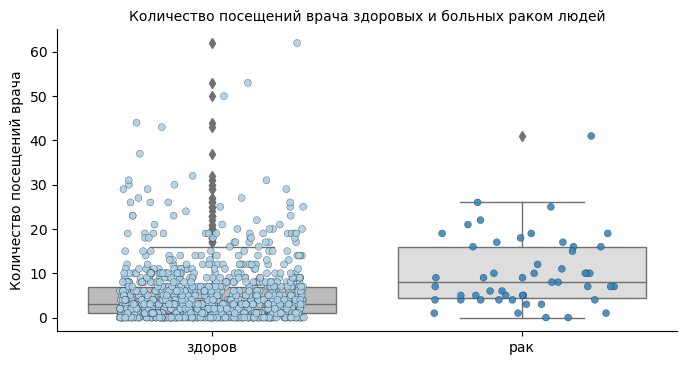

In [26]:
plt.figure(figsize=(8, 4), dpi=100)
sns.stripplot(x = data['cancer'], y=data['prior_appts_attended'], alpha=.90, jitter = 0.3, palette = 'Blues', edgecolor='black',linewidth=0.2)
sns.despine()
sns.boxplot(x = data['cancer'], y=data['prior_appts_attended'], palette=['#BBBBBB','#DDDDDD'],linewidth=1)
plt.title('Количество посещений врача здоровых и больных раком людей', fontsize = 10)
plt.xlabel('')
plt.ylabel('Количество посещений врача')
plt.xticks([0,1], ['здоров', 'рак'],fontsize = 10)

In [27]:
#Больные раком в среднем примерно в 2 раза чаще посещают врача.

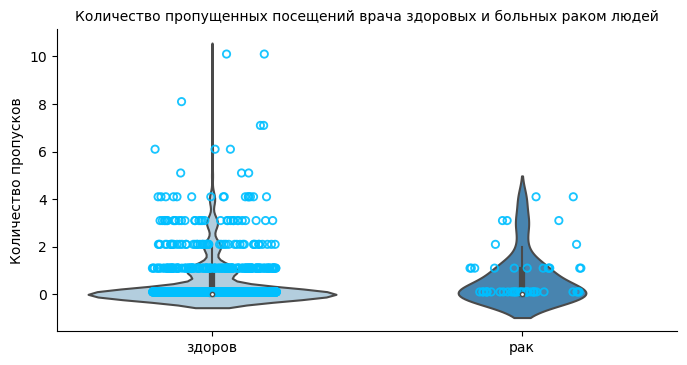

In [28]:
plt.figure(figsize=(8, 4), dpi=100)
sns.stripplot(x = data['cancer'], y=data['prior_dnas'], data=data, alpha=.90, jitter = 0.2, marker = '$\circ$', size = 10, color = 'deepskyblue')
sns.violinplot( x=data['cancer'], y=data['prior_dnas'], palette="Blues")
plt.title('Количество пропущенных посещений врача здоровых и больных раком людей', fontsize = 10)
plt.xlabel('')
plt.ylabel('Количество пропусков')
plt.xticks([0,1], ['здоров', 'рак'],fontsize = 10)
sns.despine()

In [29]:
#В среднем и здоровые, и больные раком достаточно дисциплинированы и редко пропускают приемы врача. Стоит отметить, что под здоровыми здесь подразумеваются в том числе те, у которых есть иные заболевания. Однако максимальное число пропусков для раковых больных не превосходит 4, тогда как у здоровых доходит до 10. Здесь есть 2 объяснения: раковые больные более внимательны к своему здоровью и , возможно, люди, пропускающие приемы, живут недолго.

Text(0.5, 1.0, 'Наличие метастазов и раковых клеток')

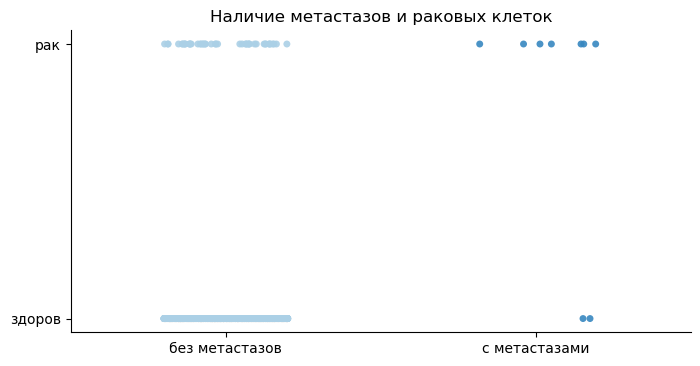

In [30]:
plt.figure(figsize=(8, 4), dpi=100)
sns.stripplot(x = data['metastatic_cancer'], y=data['cancer'], data=data, alpha=.90, jitter = 0.2, palette = 'Blues')
sns.despine()
plt.xlabel('')
plt.ylabel('')
plt.xticks([0,1], ['без метастазов', 'с метастазами'],fontsize = 10)
plt.yticks([0,1], ['здоров', 'рак'],fontsize = 10)
plt.title('Наличие метастазов и раковых клеток')

In [31]:
#В данных присутствуют нетоности. На пересечении метастазов и рака не должно быть точек. Вероятно, это ошибки в данных.

Text(0.5, 1.0, 'Аритмия у пациентов, перенесших инсульт')

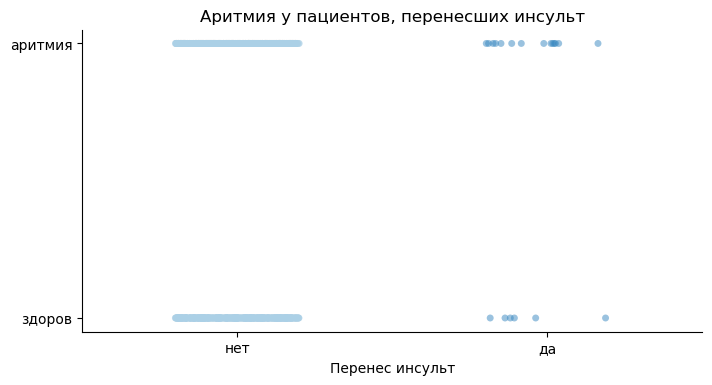

In [32]:
plt.figure(figsize=(8, 4), dpi=100)
sns.stripplot(x = data['stroke'], y=data['arrhythmias'], data=data, alpha=.50, jitter = 0.2, palette = 'Blues')
sns.despine()
plt.xlabel('Перенес инсульт')
plt.ylabel('')
plt.xticks([0, 1], ['нет', 'да'],fontsize = 10)
plt.yticks([0,1], ["здоров", "аритмия"],fontsize = 10)
plt.title('Аритмия у пациентов, перенесших инсульт')

In [33]:
#У людей, перенесших инсульт, часто встречается аритмия. Аритмия зачастую приводит к инсульту.

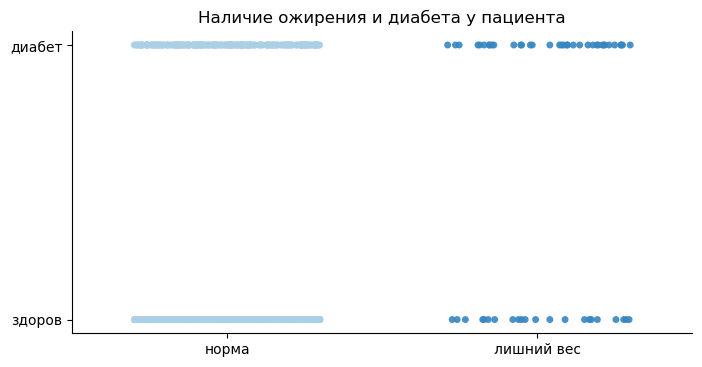

In [34]:
plt.figure(figsize=(8, 4), dpi=100)
sns.stripplot(x = data['obesity'], y=data['diabetes'], data=data, alpha=.90, jitter = 0.3, palette = 'Blues')
sns.despine()
plt.xlabel('')
plt.ylabel('')
plt.xticks([0, 1], ['норма', 'лишний вес'],fontsize = 10)
plt.yticks([0,1], ["здоров", "диабет"],fontsize = 10)
plt.title('Наличие ожирения и диабета у пациента')
sns.despine()

In [35]:
#Среди пациентов с линей массой тела бОльше больных диабетом. Обе болезни являются следствием неправильного питания.  Если человек ест много сладкого, у него повышается риск обоих заболеваний.

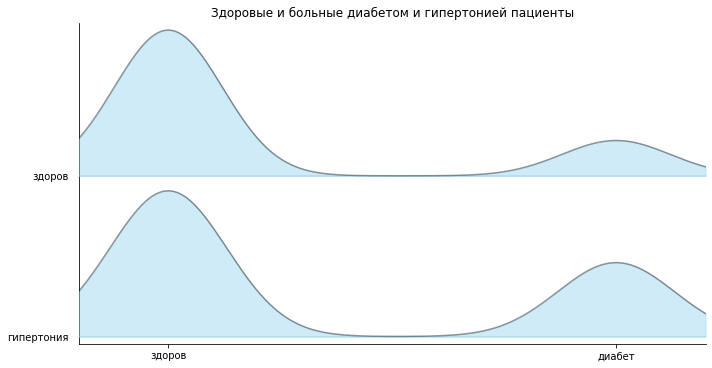

In [36]:

joypy.joyplot(data, column=['diabetes'], by="hypertension", ylim ='own',figsize=(10,5), color='skyblue', alpha = 0.4, overlap = 0, labels = ('здоров', "гипертония"))
sns.despine()
plt.xlabel('')
plt.ylabel('')
plt.xticks([0, 1], ['здоров', 'диабет'],fontsize = 10)
plt.title('Здоровые и больные диабетом и гипертонией пациенты')
sns.despine()

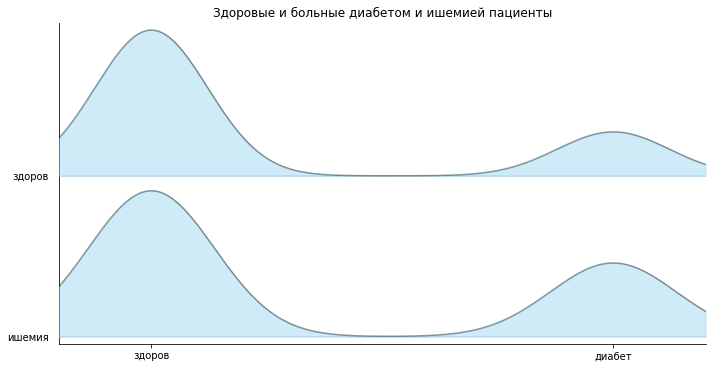

In [37]:
joypy.joyplot(data, column=['diabetes'], by="ihd", ylim ='own',figsize=(10,5), color='skyblue', alpha = 0.4, overlap = 0, labels = ('здоров', "ишемия"))
sns.despine()
plt.xlabel('')
plt.ylabel('')
plt.xticks([0, 1], ['здоров', 'диабет'],fontsize = 10)
plt.title('Здоровые и больные диабетом и ишемией пациенты')
sns.despine()

In [38]:
#Большинство пациентов с диабетом также больны гипертонией и ишемией.  Диабет увеличивает риск других заболеваний.


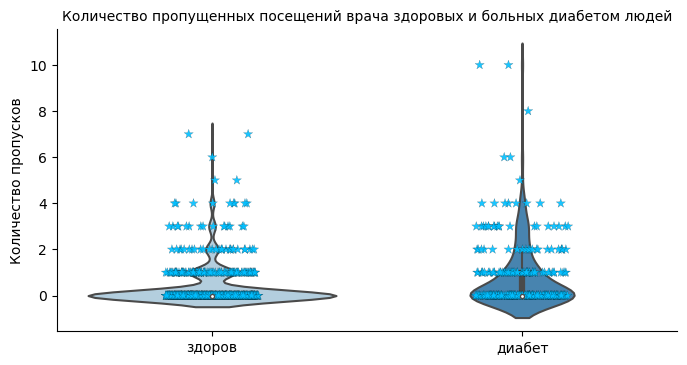

In [39]:
plt.figure(figsize=(8, 4), dpi=100)
sns.stripplot(x = data['diabetes'], y=data['prior_dnas'], data=data, alpha=.90, jitter = 0.15, color = 'deepskyblue', marker = '*', edgecolor = 'black', linewidth = 0.1, size = 7)
sns.despine()
sns.violinplot( x=data['diabetes'], y=data['prior_dnas'], palette="Blues")
plt.title('Количество пропущенных посещений врача здоровых и больных диабетом людей', fontsize = 10)
plt.xlabel('')
plt.ylabel('Количество пропусков')
plt.xticks([0,1], ['здоров', 'диабет'],fontsize = 10)
sns.despine()

In [40]:
#Иная ситуация по сравнению с раковыми больными наблюдается у диабетиков. Они также редко пропускают приемы врача,  но на графике видны сильные выбросы. Диабет не является столь серьезным заболеванием, как рак, видимо, поэтому пациенты более халатны к своему здоровью.


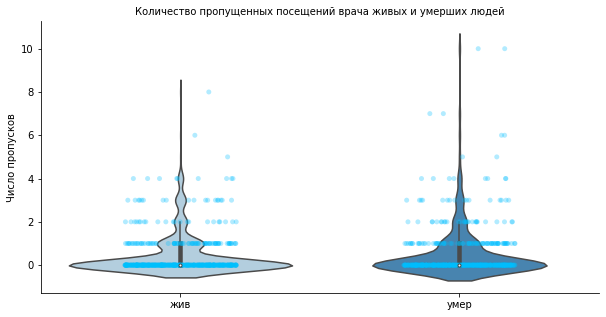

In [41]:
plt.figure(figsize=(10,5))
ax = sns.stripplot(x=data['death'], y=data['prior_dnas'], color="deepskyblue", alpha = 0.3, jitter = 0.2)
plt.title('Количество пропущенных посещений врача живых и умерших людей', fontsize = 10)
sns.violinplot( x=data['death'], y=data['prior_dnas'], palette="Blues")
plt.xlabel('')
plt.ylabel('Число пропусков')
plt.xticks([0,1], ['жив', 'умер'],fontsize = 10)
sns.despine()

In [42]:
#Хотя большинство умерших людей, как и живых, редко пропускали приемы врача, у умерших людей выше дисперсия числа пропусков приемов.

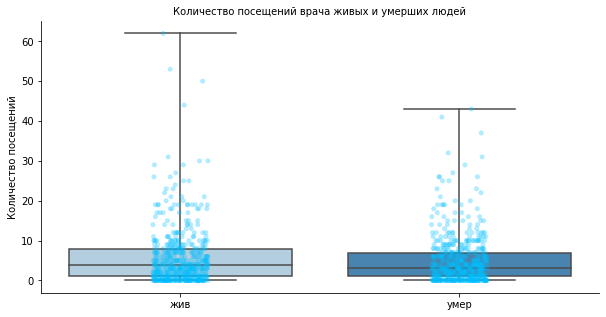

In [43]:
plt.figure(figsize=(10,5))
sns.boxplot(x=data['death'], y=data['prior_appts_attended'], whis=np.inf, palette = 'Blues')
sns.stripplot(x=data['death'], y=data['prior_appts_attended'], color="deepskyblue", alpha = 0.3)
plt.title('Количество посещений врача живых и умерших людей', fontsize = 10)
plt.xlabel('')
plt.ylabel('Количество посещений')
plt.xticks([0,1], ['жив', 'умер'],fontsize = 10)
sns.despine()

In [44]:
#Живые в среднем чаще посещали врача, чем умершие. Возможно, халатное отношение к здоровью в некоторых случаях явилась причиной летального исхода. Другой вариант – умершие слишком поздно узнали о диагнозе.


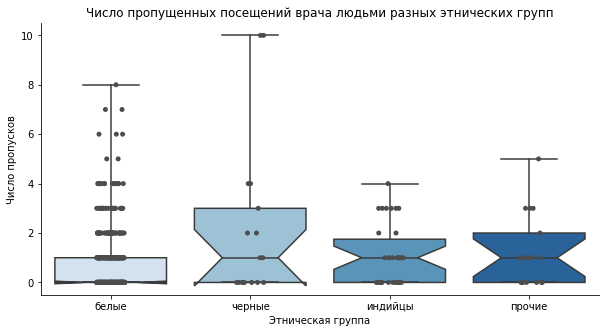

In [45]:
plt.figure(figsize=(10,5))
sns.boxplot(x=data['ethnicgroup'], y=data['prior_dnas'], whis=np.inf, palette = 'Blues', notch = 1)
sns.stripplot(x=data['ethnicgroup'], y=data['prior_dnas'], color=".3")
plt.xlabel('Этническая группа')
plt.ylabel('Число пропусков')
plt.xticks([0, 1, 2, 3], ['белые', 'черные', "индийцы", "прочие"],fontsize = 10)
plt.title('Число пропущенных посещений врача людьми разных этнических групп')
sns.despine()

In [46]:
#Белые в среднем реже пропускают приемы у врача. Это может быть связано с тем, что белые в среднем более обеспечены, чем представители других этнических групп, и могут себе позволить чаще проходить осмотр. Возможно и другое объяснение: белые более внимательны к своему здоровью или больше доверяют традиционной медицине.


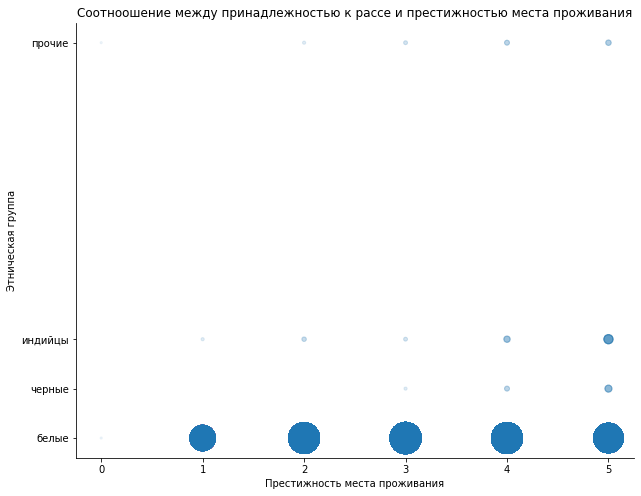

In [47]:
c = Counter(zip(data['quintile'],data['ethnicgroup']))
s = [5*c[(xx,yy)] for xx,yy in zip(data['quintile'],data['ethnicgroup'])]
plt.figure(figsize=(10,8))
plt.scatter(x = data['quintile'], y = data['ethnicgroup'], alpha = 1/15, s=s)


plt.xlabel('Престижность места проживания')
plt.ylabel('Этническая группа')
plt.yticks([1, 2, 3, 9], ["белые", "черные","индийцы", "прочие"],fontsize = 10)
plt.title('Соотноошение между принадлежностью к рассе и престижностью места проживания')
sns.despine()

In [48]:
#Большинство представителей всех этнических групп, кроме белых, проживает в бедных районах.


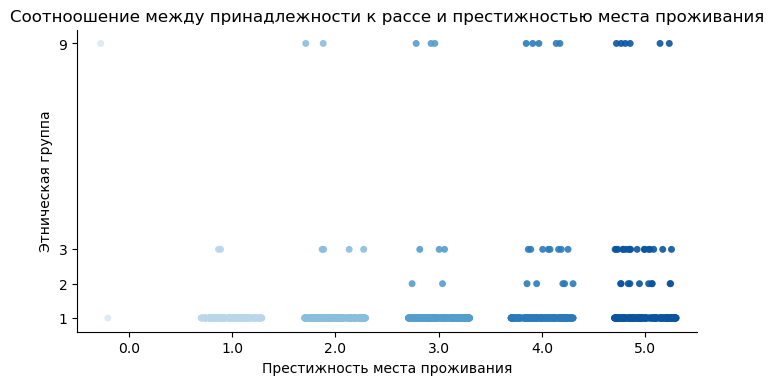

In [49]:
plt.figure(figsize=(8, 4), dpi=100)
sns.stripplot(x = data['quintile'], y=data['ethnicgroup'], data=data, alpha=.90, jitter = 0.3, palette = 'Blues')
sns.despine()
plt.xlabel('Престижность места проживания')
plt.ylabel('Этническая группа')
plt.yticks([1, 2, 3, 9], [1, 2, 3, 9],fontsize = 10)
plt.title('Соотноошение между принадлежности к рассе и престижностью места проживания')
sns.despine()

In [50]:
#Концентрация черных и индийцев выше в неблагополучных районах. Есть выбросы. В описании данных отсутствует нулевой квантиль. Вероятно,
#в эту группу поместили людей, про место жительства которых ничего не известно или людей без определенного места жительства.

In [51]:
Counter(data['quintile'])

Counter({2.0: 205,
         4.0: 220,
         3.0: 211,
         5.0: 216,
         1.0: 138,
         0.0: 4,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1,
         nan: 1})

In [52]:
def count(n, feature):
    a = b = 0
    for i in range(len(data['quintile'])):
        if data.loc[i, 'quintile'] == n:
            a+=1
            if data.loc[i, feature] == 1:
                b+=1
    freq = b/a*100
    return freq

In [53]:
arr2 = []
for n in range(1,6):
    arr2.append(count(n, 'dementia'))
print(arr2)

[7.971014492753622, 4.390243902439024, 4.265402843601896, 3.6363636363636362, 3.7037037037037033]


In [54]:
#В группе наиболее обеспеченных людей больше людей с умственными отклонениями. Это может быть связано с гос. поддержкой таких людей.

In [55]:
arr3 = []
for n in range(1,6):
    arr3.append(count(n, 'mental_health'))
print(arr3)

[6.521739130434782, 5.853658536585367, 9.47867298578199, 9.090909090909092, 11.574074074074074]


In [56]:
#Обеспеченные люди более психически здоровы, чем бедные. Вероятно, у последних возникают сложности из-за финансового положения и хуже доступ к врачам и лекарствам
#Кроме того, у психически больных людей может быть меньше шансов найти высокооплачиваемую работу.

In [57]:
arr1 = []
for n in range(1,6):
    arr1.append(count(n, 'cancer'))
print(arr1)

[5.797101449275362, 5.365853658536586, 6.6350710900473935, 4.545454545454546, 3.2407407407407405]


In [58]:
#У обеспеченных людей чаще стоит диагноз "рак". Скорее, это связано с более тщательным и частым обследованием.

In [59]:
arr4 = []
for n in range(1,6):
    arr4.append(count(n, 'diabetes'))
print(arr4)

[14.492753623188406, 29.756097560975608, 24.170616113744074, 29.545454545454547, 39.351851851851855]


In [60]:
#У бедных чаще есть сахарный диабет из-за плохого питания.

In [61]:
arr5 = []
for n in range(1,6):
    arr5.append(count(n, 'copd'))
print(arr5)

[16.666666666666664, 20.975609756097562, 18.95734597156398, 24.545454545454547, 36.574074074074076]


In [62]:
#У самой бедной группы населения хроническая обструктивная болезнь легких встречается более чем в 2 раза чаще, чем у самой обеспеченной. 
#Это может быть связано с тем, что первые проживают в более загрязненных районах и работают на вредных производствах.

In [63]:
arr6 = []
for n in range(1,6):
    arr6.append(count(n, 'obesity'))
print(arr6)

[2.1739130434782608, 4.878048780487805, 6.161137440758294, 7.2727272727272725, 7.4074074074074066]


In [64]:
#Бедные чаще страдают от ожирения из-за плохого питания (фастфуд) и отсутствия фитнеса.

In [65]:
arr0 = [1,2,3,4,5]

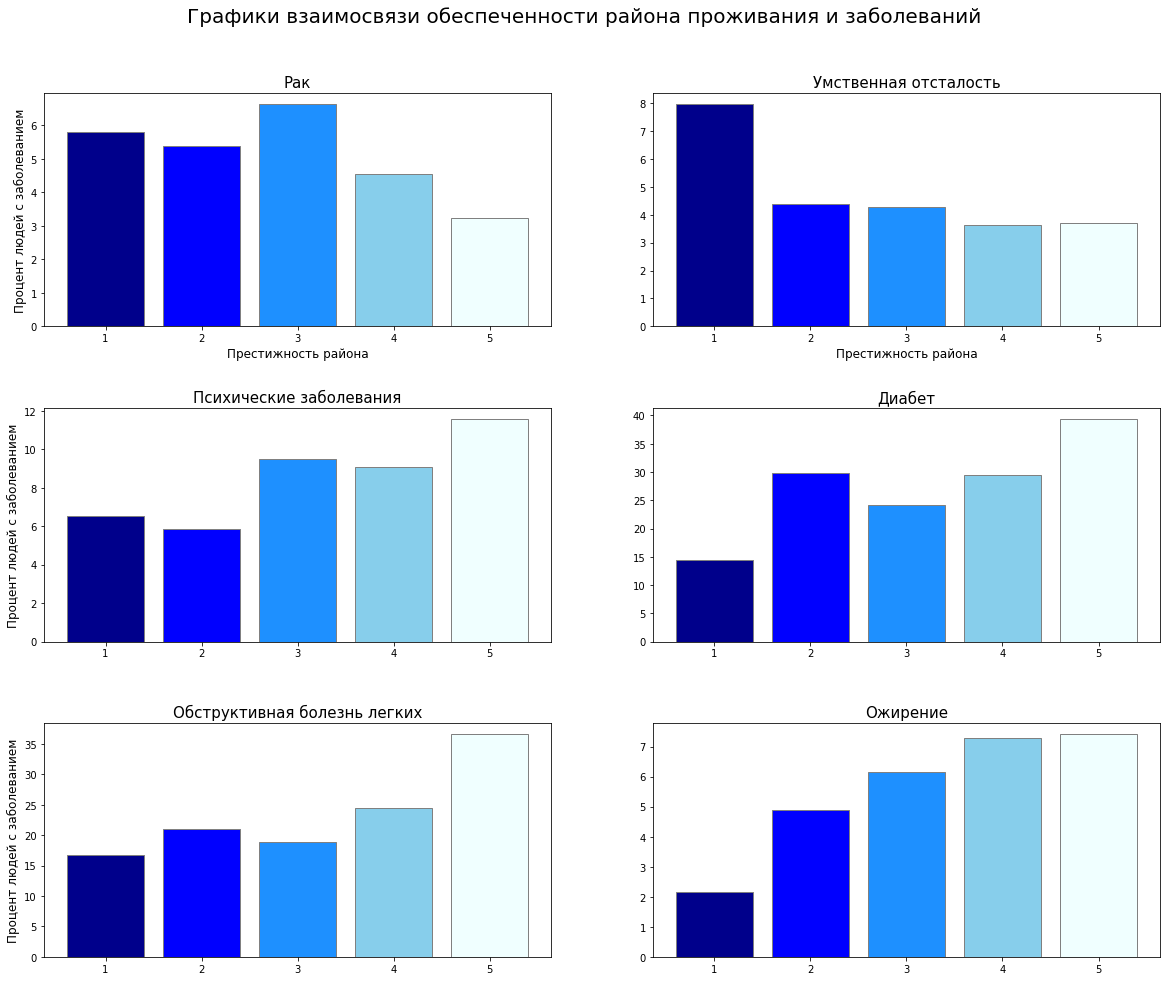

In [66]:
fig = plt.figure(figsize=(20,15))
plt.suptitle('Графики взаимосвязи обеспеченности района проживания и заболеваний', size = 20)
plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.35)


plt.subplot(3, 2, 1)
plt.title('Рак', size = 15)
plt.xlabel('Престижность района', size = 12)
plt.ylabel('Процент людей с заболеванием', size = 12)
plt.bar(arr0, arr1, color = ['darkblue', 'blue', 'dodgerblue', 'skyblue', 'azure'], edgecolor = 'grey')

plt.subplot(3, 2, 2)
plt.bar(arr0, arr2, color = ['darkblue', 'blue', 'dodgerblue', 'skyblue', 'azure'], edgecolor = 'grey')
plt.title('Умственная отсталость', size = 15)
plt.xlabel('Престижность района', size = 12)

plt.subplot(3, 2, 3)
plt.bar(arr0, arr3, color = ['darkblue', 'blue', 'dodgerblue', 'skyblue', 'azure'], edgecolor = 'grey')
plt.title('Психические заболевания', size = 15)
plt.ylabel('Процент людей с заболеванием', size = 12)

plt.subplot(3, 2, 4)
plt.bar(arr0, arr4, color = ['darkblue', 'blue', 'dodgerblue', 'skyblue', 'azure'], edgecolor = 'grey')
plt.title('Диабет',size = 15)

plt.subplot(3, 2, 5)
plt.bar(arr0, arr5, color = ['darkblue', 'blue', 'dodgerblue', 'skyblue', 'azure'], edgecolor = 'grey')
plt.title('Обструктивная болезнь легких', size = 15)
plt.ylabel('Процент людей с заболеванием', size = 12)

plt.subplot(3, 2, 6)
plt.bar(arr0, arr6, color = ['darkblue', 'blue', 'dodgerblue', 'skyblue', 'azure'], edgecolor = 'grey')
plt.title('Ожирение', size = 15)

plt.show()

In [67]:
'''death (0/1)

los (hospital length of stay in nights)

age (in years)

gender (1=male, 2=female)

cancer

cabg (previous heart bypass) - шунтирование сердца

crt (cardiac resynchronisation device - a treatment for heart failure) - устройство для сердечной ресинхронизации - лечение сердечной недостаточности

defib (defibrillator implanted)  - дефибрилятор 

dementia - слабоумие

diabetes (any type) - диабет

hypertension - гипертония

ihd (ischaemic heart disease)

mental_health (any mental illness) - психическое здоровье

arrhythmias - аритмия

copd (chronic obstructive lung disease) - хроническая обструктивная болезнь легких

obesity - ожирение

pvd (peripheral vascular disease) - заболевание периферических артерий

renal_disease - почечная недостаточность

valvular_disease (disease of the heart valves) - поражение сердечного клапана

metastatic_cancer - метастатический рак

pacemaker - кардиостимулятор

pneumonia - пневмония

priorapptsattended (number of outpatient appointments attended in the previous year) - количество амбулаторных приемов в предыдущем году

prior_dnas (number of outpatient appointments missed in the previous year) - количество пропущенных амбулаторных приемов в прошлом году

pci (percutaneous coronary intervention) - чрезкожное коронарное вмешательство

stroke (history of stroke) - инсульт

senile - глубокая старость

quintile (socio-economic status for patient's neighbourhood, from 1 (most affluent) to 5 (poorest)) - социальный статус места проживания

ethnicgroup (see below for categories) - этническая группа

fu_time (follow-up time, i.e. time in days since admission to hospital) - время наблюдения

Ethnic group has the following categories in this extract:

1=white

2=black

3=Indian subcontinent

8=not known

9=other

Inspiration :

Factors associated with hospital emergency readmission and mortality rates in patients with heart failure.'''

"death (0/1)\n\nlos (hospital length of stay in nights)\n\nage (in years)\n\ngender (1=male, 2=female)\n\ncancer\n\ncabg (previous heart bypass) - шунтирование сердца\n\ncrt (cardiac resynchronisation device - a treatment for heart failure) - устройство для сердечной ресинхронизации - лечение сердечной недостаточности\n\ndefib (defibrillator implanted)  - дефибрилятор \n\ndementia - слабоумие\n\ndiabetes (any type) - диабет\n\nhypertension - гипертония\n\nihd (ischaemic heart disease)\n\nmental_health (any mental illness) - психическое здоровье\n\narrhythmias - аритмия\n\ncopd (chronic obstructive lung disease) - хроническая обструктивная болезнь легких\n\nobesity - ожирение\n\npvd (peripheral vascular disease) - заболевание периферических артерий\n\nrenal_disease - почечная недостаточность\n\nvalvular_disease (disease of the heart valves) - поражение сердечного клапана\n\nmetastatic_cancer - метастатический рак\n\npacemaker - кардиостимулятор\n\npneumonia - пневмония\n\npriorapptsatte